# Проверка гипотез

Подгружаем необходимые библиотеки.

In [16]:
import pandas as pd 
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import ranksums
import scipy.stats as sts 

warnings.filterwarnings("ignore")

Подгружаем датафрейм после EDA-анализа.

In [17]:
data=pd.read_csv('analysi.csv')
data

,date,likes,reposts,views,comments,name,price,product_category,catalog_category,time,time_category,price_category
0,11.04.2024,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590,платья,платья,15:00:00,дневное,средний
1,11.04.2024,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690,платья,платья,10:00:00,утреннее,средний
2,09.04.2024,40,35,9721,0,Хлопковые костюмы с жилетом,2690,костюмы,комплекты,13:00:00,дневное,средний
3,09.04.2024,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550,платья,платья,11:00:00,утреннее,средний
4,09.04.2024,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550,платья,платья,09:00:00,утреннее,средний
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,17.02.2023,30,31,11002,0,Платье-свитер в полосочку на молнии,2390,платья,платья,05:00:00,ночное,средний
1212,17.02.2023,28,36,8779,0,Тройной купальник с высокой посадкой,1690,купальники,купальники,02:00:00,ночное,дешёвый
1213,16.02.2023,35,35,10657,2,Комплект с юбкой и джемпером,3290,платья,платья,23:00:00,ночное,дорогой
1214,16.02.2023,20,22,12509,0,Боди с ассиметричным вырезом,1550,боди,блузки/рубашки/свитера,18:00:00,вечернее,дешёвый


Для начала напишем функцию для проверки гипотез на разных уровнях значимости: 1%, 5%, 10%.

In [18]:
def check_hip(p_value): 
    """  
    Функция проверяет гипотезу на разных уровнях значимости(0.01, 0.05, 0.1) и примнимает либо оправергает ее      
    Parameters  
    ----------  
    p_value : float  
       p-уровень значимости, найденный по нашей выборке 
    Returns  
    -------  
    str  
       Подтверждение гипотезы на определенном уровне значимости 
    str 
        Опровержение гипотезы на определенном уровне значимости 
    """       
    if  p_value < 0.01:          
         return(f'Гипотеза отвергается при уровне значимости 0.01 и выше')        
    else:         
        if p_value < 0.05: 
            return(f'Гипотеза отвергается при уровне значимости 0.05 и выше')         
        else: 
            if p_value < 0.1:                 
                return(f'Гипотеза отвергается при уровне значимости 0.1 и выше') 
            else: 
                return(f'Гипотеза принимается при уровне значимости 0.1, так как наша p_value составляет {round(p_value, 2)}')

# Гипотеза №1. Репрезентативность метрик likes и reposts для оценки популярности поста.

Проверим гипотезу о качестве метрик likes и reposts при измерении популярности поста при помощи ttest для двух независмых выборок на уровнях значимости 1%, 5%, 10%. Формулируем гипотезу следующим образом.

.

$$
\begin{aligned}
& H_0: \mu_{x} = \mu_{y} \\
& H_1: \mu_{x} \neq \mu_{y}
\end{aligned}
$$
​
где $\mu_{x}$ - математическое ожидание популярности поста сообщества, оцененное по метрике likes, $\mu_{y}$ - математическое ожидание популярности поста сообщества, оценённое по метрике reposts.


In [19]:
x_1=data['likes']
y_1=data['reposts']
t_statistic, p_value_1 = stats.ttest_ind(x_1, y_1)

In [20]:
check_hip(p_value_1)

'Гипотеза отвергается при уровне значимости 0.01 и выше'

Основная гипотеза отвергается в пользу адьтернативной. Есть статистически значимые различия между likes (лайками) и reposts(репостами), поскольку средние значения likes(лайков) и reposts(репостов) отличаются, поэтому нельзя исключить переменную reposts(репосты) при оценке популярности поста. Следовательно, при предсказании целевой переменной в машинном обучении нам будет необходим этот параметр.

Посмотрим на наличие выбросов, которые могли исказить наш результат при проверке гипотез.

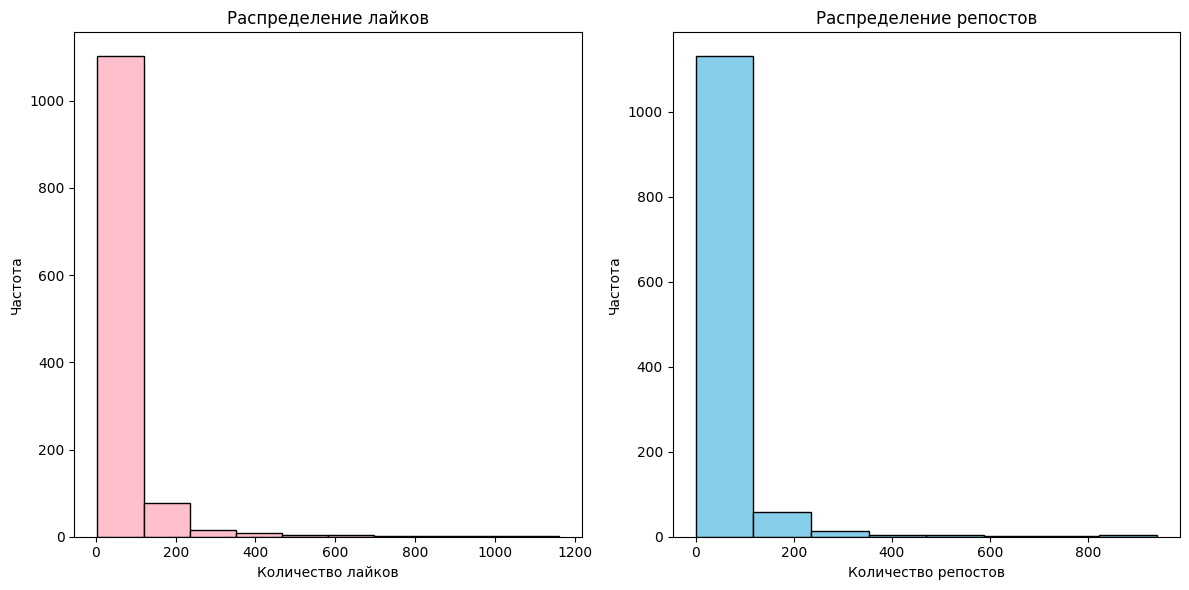

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(x_1, bins=10, color='pink', edgecolor='black')
plt.xlabel('Количество лайков')
plt.ylabel('Частота')
plt.title('Распределение лайков')

plt.subplot(1, 2, 2)
plt.hist(y_1, bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Количество репостов')
plt.ylabel('Частота')
plt.title('Распределение репостов')

plt.tight_layout()
plt.show()

Поскольку в распределении likes и reposts имеются выбросы и данные не описываются нормальным распределением, для того, чтобы удостовериться в верности проверки гипотезы проведем тест Уилкоксона (аналог t-test).

In [22]:
statistic, p_value_1y = ranksums(x_1, y_1)
check_hip(p_value_1y)

'Гипотеза отвергается при уровне значимости 0.01 и выше'

Тест Уилкоксона показал анлогичный результат, следовательно, дейтсивтельно, likes и reposts являются репрезентативными метриками популярности поста и при предсказании целевой перменной в машинном обучении не могут взаимоисключаться.

# Гипотеза №2:Взаимосвязь популярности публикации и просмотров

Проверим гипотезу о взаимосвязи метрик likes и reposts при измерении популярности поста при помощи коэффициенты корреляции Пирсона. 

$$
\begin{aligned}
& H_0: corr(likes, reposts) \neq 0 \
& H_1: corr(likes, reposts) = 0 \
\end{aligned}
$$

In [23]:
x_2 = data['likes']
y_2 = data['views']

Проверим нашу гипотезу, используя `коэффициент корреляции Пирсона` на разных уровнях значимости

In [36]:
corr, p_value_2 = stats.pearsonr(x_2, y_2) #посчитали коэф корреляции Пирсона
print(f'корреляция между лайками и просмотрами = {corr.round(2)}')
print(f'p-value = {p_value_2}')

корреляция между лайками и просмотрами = 0.87
p-value = 0.0


In [34]:
if  p_value_2 < 0.01:          
    print(f'Существует статистически значимая зависимость между переменными при уровне значимости 0.01 и выше, так как наща p_value = {p_value_2}')        
else:         
    if p_value_2 < 0.05: 
        print(f'Существует статистически значимая зависимость между переменными 0.05 и выше')         
    else: 
        if p_value_2 < 0.1:                 
            print(f'Существует статистически значимая зависимость между переменными при уровне значимости 0.1 и выше') 
        else:
            print('Нет статистически значимой зависимости между переменными')

Существует статистически значимая зависимость между переменными при уровне значимости 0.01 и выше, так как наща p_value = 0.0


<Axes: title={'center': 'Диаграмма рассеяния количества лайков и количества просмотров'}, xlabel='likes', ylabel='views'>

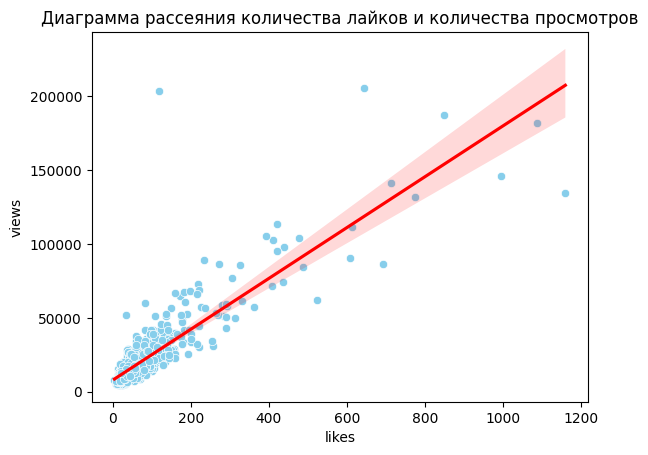

In [38]:
sns.scatterplot(x=x_2, y=y_2, color='skyblue')
plt.xlabel('Количество лайков')
plt.ylabel('Количество просмотров')
plt.title('Диаграмма рассеяния количества лайков и количества просмотров')
sns.regplot(x=x_2, y=y_2, scatter=False, color='red') 

P-value в методе корреляции Пирсона (`pearsonr`) представляет собой вероятность того, что наблюдаемая корреляция между двумя переменными была бы получена случайным образом, если корреляция фактически отсутствует. Так как **`наша p-value = 0`**, мы можем сделать вывод, что **положительная взаимосвязь между количеством лайков и числом просмотров публикации действительно существует и причем очень сильная**. Следовательно, **`наша гипотеза подтверждается`!**

# Гипотеза №3. Взаимосвязь популярности публикации и цены публикуемого товара.

Проверим гипотезу о связанности популярности поста и цены публикуемого товара асимптотическим Z-тестом на уровнях значимости 1%, 5%, 10%. В качестве метрики популярности используется перемнная likes (обоснована в предыдущем разделе). Формулируем гипотезу следующим образом.

.

$$
\begin{aligned}
& H_0: \mu_{x} = \mu_{y} \\
& H_1: \mu_{x} > \mu_{y}
\end{aligned}
$$


где $\mu_{x}$ - математическое ожидание популярности публикации, измеряемое в likes для дешёвых товароы и товаров среднего ценового сегмента, $\mu_{y}$ - математическое ожидание популярности поста, измеряемой в likes с учетом цены дорогих товаров.


In [9]:
x_3 = data[(data['price_category'] == 'дешёвый') | (data['price_category'] == 'средний')]['likes']
y_3 = data[data['price_category'] == 'дорогой']['likes']

mu_x_3 = data[(data['price_category'] == 'дешёвый') | (data['price_category'] == 'средний')]['likes'].mean()
mu_y_3 =  data[data['price_category'] == 'дорогой']['likes'].mean()

print(mu_x_3, mu_y_3)

66.37325174825175 64.65277777777777


Разница практически незаметна. Проверим ее статистическую значимость

In [10]:
z_obs = (x_3.mean() - y_3.mean()) / np.sqrt(x_3.var(ddof = 1)/x_3.size + y_3.var(ddof = 1)/y_3.size)
p_value_3 = 1 - sts.norm().cdf(z_obs)
p_value_3

0.44794775578528057

Проверим, принимается ли гипотеза.

In [11]:
check_hip(p_value_3)

'Гипотеза принимается при уровне значимости 0.1, так как наша p_value составляет 0.45'

Гипотеза о равенстве математических ожиданий принимается, следовательно, цена товаров не влияет на популярность поста, измеряемую в лайках.

Посмотрим на наличие выбросов, которые могли исказить наш результат при проверке гипотез.

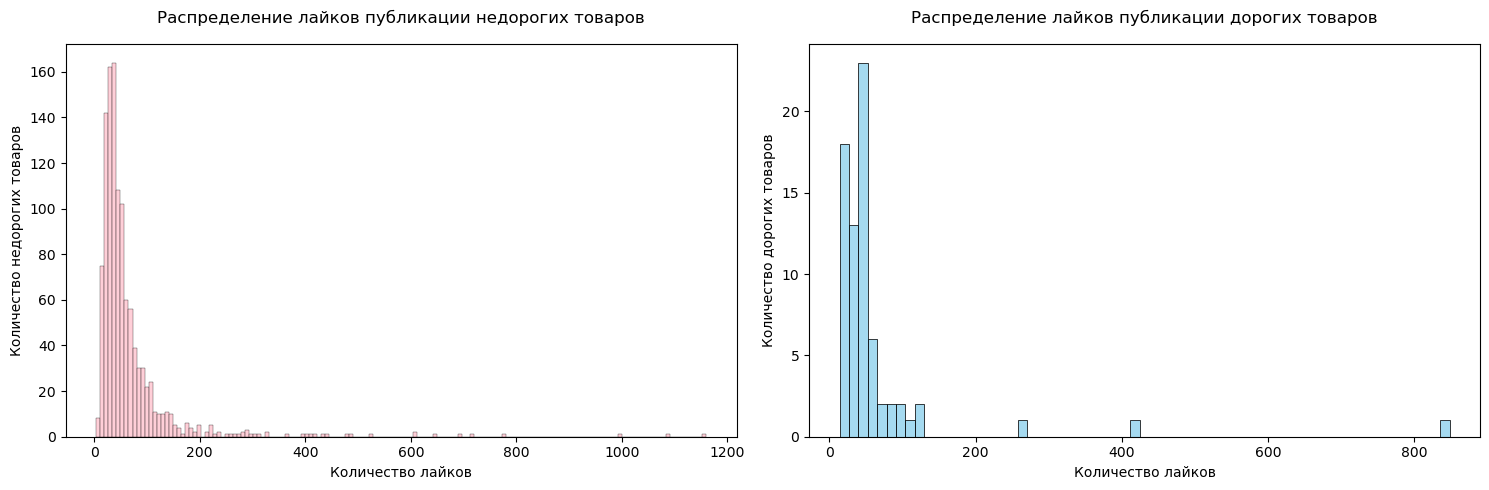

In [12]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(x_3, ax = axes[0], color = 'pink')
axes[0].set_xlabel('Количество лайков')
axes[0].set_ylabel('Количество недорогих товаров')
axes[0].set_title('Распределение лайков публикации недорогих товаров', pad = 15)


sns.histplot(y_3, ax = axes[1], color = 'skyblue')
axes[1].set_xlabel('Количество лайков')
axes[1].set_ylabel('Количество дорогих товаров')
axes[1].set_title('Распределение лайков публикации дорогих товаров', pad = 15)
plt.tight_layout()

Поскольку в распрделении количества лайков у публикаций как дорогих, так и недорогих товаров имеются выбросы и наши данные не описываются нормальным распределением, для того, чтобы удостовериться в верности проверки гипотезы проведем тест Уилкоксона (аналог t-test).

In [13]:
statistic, p_value_3y = ranksums(x_3, y_3)
check_hip(p_value_3y)

'Гипотеза принимается при уровне значимости 0.1, так как наша p_value составляет 0.29'

Тест Уилкоксона показал анлогичный результат, следовательно, дейтсивтельно цена товаров не влияет на популярность поста, измеряемую в лайках.

# Гипотеза №4. Взаимосвязь количества комментариев и цены публикуемого товара.

Проверим гипотезу о равенстве средних: количество комментариев под постами с дорогими товарами и количество комментариев под постами с недорогими товарами не отличается. Проверку осуществим асимптотическим Z-тестом на уровнях значимости 1%, 5%, 10%. Формулируем гипотезу следующим образом.

$$
\begin{aligned}
& H_0: \mu_{x} = \mu_{y} \\
& H_1: \mu_{x} > \mu_{y}
\end{aligned}
$$
​
где $\mu_{x}$ - математическое ожидание количества комментариев под публикациями дешёвых товаров и товаров среднего ценового сегмента, $\mu_{y}$ - математическое ожидание комментариев под постами с дорогими товарами при учёте их цены.


In [14]:
x_4 = data[(data['price_category'] == 'дешёвый') | (data['price_category'] == 'средний')]['comments']
y_4 = data[data['price_category'] == 'дорогой']['comments']

mu_x_4 = data[(data['price_category'] == 'дешёвый') | (data['price_category'] == 'средний')]['comments'].mean()
mu_y_4 =  data[data['price_category'] == 'дорогой']['comments'].mean()

print(mu_x_4, mu_y_4)

0.9082167832167832 1.3472222222222223


Разница есть, но несущественная. Проверим ее статистическую значимость

In [15]:
z_obs_1 = (mu_x_4 - mu_y_4) / np.sqrt(x_4.var(ddof = 1)/x_4.size + y_4.var(ddof = 1)/y_4.size)
p_value_4 = 1 - sts.norm().cdf(z_obs_1)
check_hip(p_value_4)

'Гипотеза принимается при уровне значимости 0.1, так как наша p_value составляет 0.86'

Гипотеза о равенстве среднего количества комментариев под постами с недорогими и дорогими товарами примается, следовательно, цена товаров не влияет на количество комментариев под постом.

Посмотрим на наличие выбросов, которые могли исказить наш результат при проверке гипотез.

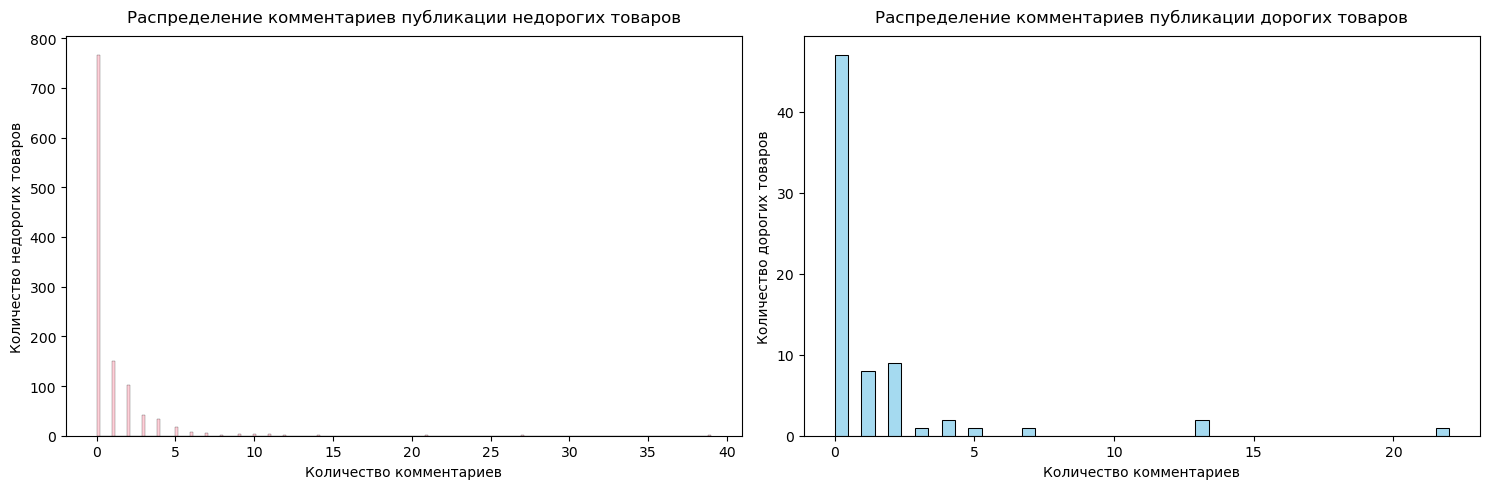

In [16]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(x_4, ax = axes[0], color = 'pink')
axes[0].set_xlabel('Количество комментариев')
axes[0].set_ylabel('Количество недорогих товаров')
axes[0].set_title('Распределение комментариев публикации недорогих товаров', pad = 10)

sns.histplot(y_4, ax = axes[1], color = 'skyblue')
axes[1].set_xlabel('Количество комментариев')
axes[1].set_ylabel('Количество дорогих товаров')
axes[1].set_title('Распределение комментариев публикации дорогих товаров', pad = 10)
plt.tight_layout()

Поскольку в распрделении количества комментариев у публикаций как дорогих, так и недорогих товаров имеются выбросы и наши данные не описываются нормальным распределением, для того, чтобы удостовериться в верности проверки гипотезы проведем тест Уилкоксона (аналог t-test).

In [17]:
statistic, p_value_4y = ranksums(x_4, y_4)
check_hip(p_value_4y)

'Гипотеза принимается при уровне значимости 0.1, так как наша p_value составляет 0.71'

Тест Уилкоксона показал анлогичный результат, следовательно, дейтсивтельно цена товаров не влияет на колличество комментариев под постом.